In [1]:
import torch

import numpy as np
import time
import matplotlib.pyplot as plt

from buffer import ReplayBuffer
import gymnasium as gym        

device = torch.device('mps')

%load_ext autoreload
%autoreload 2

In [29]:
class channelFirst(gym.ObservationWrapper):
    def __init__(self, env: gym.Env):
        gym.ObservationWrapper.__init__(self, env)
        
    def observation(self, observation):
        return observation.T

env = gym.make('ALE/Boxing-v5', render_mode="rgb_array")
env = gym.wrappers.ResizeObservation(env, shape=(64,64))
# env = gym.wrappers.NormalizeObservation(env)
# env = channelFirst(env)
obs, _ = env.reset()

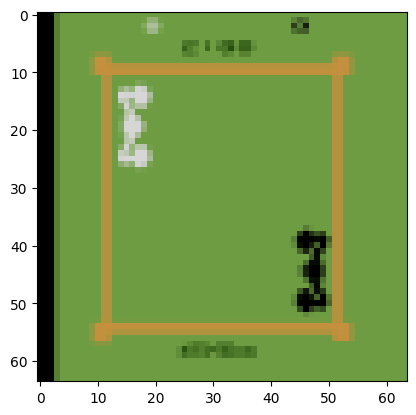

In [30]:
# plt.imshow(obs.transpose([1, 2, 0]))
plt.imshow(obs)

In [22]:
buffer = ReplayBuffer(50, env, True)
print(len(buffer))


-----------initialized memory----------              

obs_buffer_shape: (50, 3, 64, 64)
actions_buffer_shape: (50, 4)
rewards_buffer_shape: (50, 1)
nxt_obs_buffer_shape: (50, 3, 64, 64)
dones_buffer_shape: (50, 1)

----------------------------------------
              
0


In [1]:
import pickle
l_b = None
with open('./dataset/prefilled_buffer.pickle', 'rb') as f:
    l_b = pickle.load(f)
    
print(l_b)

UnpicklingError: pickle data was truncated

In [23]:
from tqdm import tqdm

for i in tqdm(range(60)):
    action = env.action_space.sample()
    next_obs, reward, termination, truncation, _ = env.step(action)
    
    buffer.add(obs, action, reward, next_obs, termination | truncation)
    obs = next_obs

100%|██████████| 60/60 [00:00<00:00, 510.63it/s]


In [24]:
print(len(buffer))
print(buffer.full)

10
True


In [25]:
batch = buffer.sample(50,5, device)
print(batch.obs.shape)
print(batch.actions.shape)
print(batch.rewards.shape)
print(batch.next_obs.shape)
print(batch.dones.shape)

torch.Size([50, 5, 3, 64, 64])
torch.Size([50, 5, 4])
torch.Size([50, 5, 1])
torch.Size([50, 5, 3, 64, 64])
torch.Size([50, 5, 1])
